# Run: Anisotropic Young's Modulus (Cubic)

This notebook loads the anisotropic-young-modulus_cubic-materials_from_compliance_colored.py Python script and renders the color-mapped 3D Young's modulus surface.

Use the parameters cell below to change `S11`, `S12`, `S44`.
A list of compliance values for common cubic materials can be found e.g. as Table 15-2 in Smithells Metals Reference Book, 7th Edition.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# User-defined compliances values
S11 = 0.014928  # GPa^-1
S12 = -0.006259 # GPa^-1
S44 = 0.013280  # GPa^-1

In [3]:
# Compute the directional Young's modulus E(n) for a cubic crystal for an evenly distributed range of angles
# Formula 1/E(n) = S11 - 2*(S11 - S12 - 0.5*S44) * (n1^2*n2^2 + n2^2*n3^2 + n3^2*n1^2)

# Create uniform angular grids (θ: polar, φ: azimuthal)
samples=300 # angular resolution
theta = np.linspace(0, np.pi, samples)
phi = np.linspace(0, 2*np.pi, samples)
T, P = np.meshgrid(theta, phi)

# Unit vector components on the sphere
ax = np.sin(T) * np.cos(P)  # x = n1
ay = np.sin(T) * np.sin(P)  # y = n2
az = np.cos(T)              # z = n3

# Squared direction cosines
n1_2, n2_2, n3_2 = ax**2, ay**2, az**2

# Invariant term involving direction cosines
I2 = n1_2 * n2_2 + n2_2 * n3_2 + n3_2 * n1_2

# Compute 1/E(n)
Einv = S11 - 2.0 * (S11 - S12 - 0.5 * S44) * I2
Einv = np.maximum(Einv, 1e-16)  # avoid division by zero

# Return E(n) in GPa
E = 1.0 / Einv

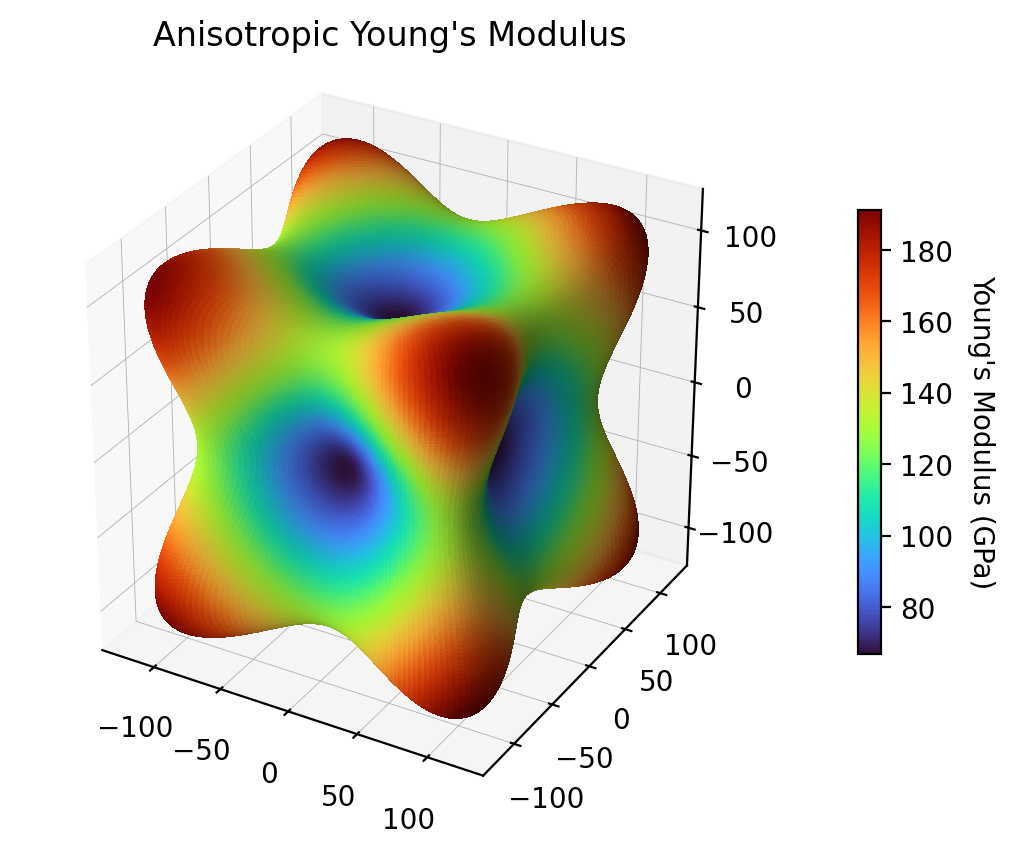

In [5]:
# 3D Visualization of calculated anisotropic Young's Modulus

# Prepare color normalization based on E values with Matplotlib 3.7+ style colormap access
norm = plt.Normalize(vmin=E.min(), vmax=E.max())
cmap = plt.colormaps['turbo']
colors = cmap(norm(E))

# Create 3D plot
plt.figure(dpi=200)
ax3 = plt.subplot(111, projection='3d')

# Plot the colored surface
surf = ax3.plot_surface(E * ax, E * ay, E * az,
                        facecolors=colors,
                        rstride=1, cstride=1,
                        linewidth=0, antialiased=False)

# Add a colorbar for scale reference
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(E)
cbar = plt.colorbar(mappable, ax=ax3, shrink=0.6, pad=0.1)
cbar.set_label("Young's Modulus (GPa)", rotation=270, labelpad=15)

# Axis labels and style
ax3.set_title("Anisotropic Young's Modulus")
try:
    ax3.set_box_aspect([1, 1, 1])
except Exception:
    pass

# Make axis tick labels smaller
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.tick_params(axis='z', labelsize=10)

# Lighten up the gridlines
ax3.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax3.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax3.zaxis._axinfo["grid"]['linewidth'] = 0.3
ax3.grid(True)

plt.show()